### 인공신경망(Neural Network) 구성을 숫자인식 예제를 통해서 알아봅시다. 

* 인공신경망은 데이터를 학습하여 비선형적인 모델을 만들 수 있습니다. 


> https://www.knime.com/sites/default/files/3-intro-deep-neural-networks.png



* 학습한다는 의미는 모델의 가중치(Weight)를 정답을 가장 잘 맞추도록 조정하는 것입니다. 

* Node(그림에서 원으로 표시된 부분)들을 연결하는 선은 각각의 가중치를 가지고 있습니다. 

* Hidden Layer 개수가 여러개 이면 Deep Neural Network라고 합니다. 
  Deep Neural Network를 활용한 모델을 만들고 학습하는 것을 딥러닝이라고 합니다. 



* 참고 링크
https://www.tensorflow.org/tutorials/quickstart/beginner

딥러닝에 필요한 기능들이 대부분 포함된 텐서플로우 프레임워크를 불러옵니다

In [ ]:
import tensorflow as tf

잘 알려진 데이터셋(Dataset)은 텐서플로우 라이브러리를 통해서 바로 불러올 수 있습니다. 

이미지를 불러오면 숫자로 이루어진 Numpy 배열로 저장됩니다. 

In [ ]:
# 데이터 불러오기
mnist = tf.keras.datasets.mnist # 텐서플로우에서 mnist 데이터를 불러올 수 있도록 합니다.  
(x_train, y_train), (x_test, y_test) = mnist.load_data()  # 위의 변수에서 실제 데이터를 불러옵니다. 

불러온 데이터를 살펴봅시다

Numpy 배열로 불러와졌고, 6만장의 28 x 28 사이즈의 이미지가 저장되어있습니다. 

0~ 255 사이의 숫자로 저장되어 있으며 흑백이미지 입니다. 

컬러이미지의 경우에는 RGB 각각 3개로 저장되어 (60000, 28,28, 3) 과 같은 형태를 가지게 되빈다

In [ ]:
type(x_train)  # Numpy 배열입니다. 

numpy.ndarray

In [ ]:
x_train.shape  # 6만장 28 x 28 사이즈

(60000, 28, 28)

In [ ]:
y_train.shape  # label이 어떤 숫자인지 저장되어 있습니다. 

(60000,)

In [ ]:
x_test.shape  # 테스트용 1만장

(10000, 28, 28)

In [ ]:
y_test.shape

(10000,)

In [ ]:
x_train[0]  # 첫번째 이미지를 불러오면 아래처럼 숫자로된 28 x 28 배열입니다

array([[  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   3,
         18,  18,  18, 126, 136, 175,  26, 166, 255, 247, 127,   0,   0,
          0,   0],
       [  

In [ ]:
y_train[0]  # 위의 그림은 숫자 5에 해당합니다. 

5

숫자로 된 이미지를 어떻게 보이는지 그려보겠습니다. 

matplotlib를 활용하여 그려봅시다. 흑백 이미지여서 흑백 출력 옵션인 cmap = 'gray'를 추가하였습니다

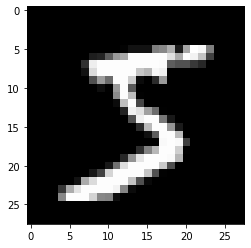

In [ ]:
import matplotlib.pyplot as plt
plt.imshow(x_train[0], cmap = 'gray')

### 간단한 Neural Network를 구성해봅시다

* 2차원의 이미지를 1차원으로 만들어주고, 
* 128개의 노드로 Hidden Layer를 추가하였습니다.
* 마지막에 각 숫자에 대한 확률을 나타내기 위해 10개의 노드를 만들었습니다. 

텐서플로우의 Sequential 함수를 사용하여 레이어를 순차적으로 만들 수 있습니다

딥러닝의 학습 성과를 높여주는 relu activation fuction을 사용하였습니다
https://upload.wikimedia.org/wikipedia/commons/thumb/4/42/ReLU_and_GELU.svg/1920px-ReLU_and_GELU.svg.png

10개의 숫자를 분류하기 위해서는 마지막에 softmax activation fuction을 사용하였습니다. 10개의 값을 1이 되도록 만들어 줍니다
https://blog.kakaocdn.net/dn/QGFKh/btqPQtew8NG/P5e54TRwt9fZqmXi55866k/img.jpg
저작권 필요

In [ ]:
# 간단한 모델 만들기

model = tf.keras.models.Sequential([
  tf.keras.layers.Flatten(input_shape=(28, 28)),
  tf.keras.layers.Dense(128, activation = 'relu'),  
  tf.keras.layers.Dense(10, activation='softmax')
])

학습을 위한 조건을 설정합니다. 정답과 오차율을 줄이기 위한 알고리즘인 Optimizer와 오차를 계산하는 방법인 loss 함수를 지정합니다

학습 중에 정확도를 볼 수 있도록 metrics = ['accuracy']를 추가하였습니다

In [ ]:
# 모델 컴파일하기
model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics = ['accuracy'])

모델 학습을 시킵니다. 이때 데이터와 Label(정답)을 넣어주고, 몇번 반복하여 학습할지 지정합니다. 

GPU 모드로 학습할 것을 권장합니다. 

In [ ]:
# 모델 학습
model.fit(x_train, y_train, epochs=10 )

Epoch 1/10
1875/1875 [==============================] - 7s 3ms/step - loss: 2.6090 - accuracy: 0.8589
Epoch 2/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.3911 - accuracy: 0.9100
Epoch 3/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.2920 - accuracy: 0.9283
Epoch 4/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.2516 - accuracy: 0.9369
Epoch 5/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.2255 - accuracy: 0.9443
Epoch 6/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.2214 - accuracy: 0.9471
Epoch 7/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.1919 - accuracy: 0.9528
Epoch 8/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.1959 - accuracy: 0.9540
Epoch 9/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.1802 - accuracy: 0.9566
Epoch 10/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.181

테스트셋의 정확도를 평가해봅니다. 테스트셋은 학습 과정에 사용되지 않은 데이터를 활용합니다

In [ ]:
# 성과 평가
model.evaluate(x_test,  y_test)

313/313 [==============================] - 1s 2ms/step - loss: 0.2979 - accuracy: 0.9447


[0.29792550206184387, 0.9447000026702881]